<a href="https://colab.research.google.com/github/reisyanzwaa/POSTTEST4.ipynb-Kecerdasan-Buatan-Rei099/blob/main/2309106099_ReisyaNazwaAnindya_POSTTEST4_KB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**POSTTEST 2**

import pandas as pd
Pandas adalah library Python untuk mengelola data dalam
bentuk tabel (mirip Excel). Disingkat pd biar gampang dipanggil. Biasanya dipakai untuk membaca file CSV/Excel, membersihkan data, dan analisis data tabular.

In [90]:
import pandas as pd

import numpy as np
NumPy adalah library untuk operasi matematika & array multidimensi. Disingkat np. Dipakai kalau butuh fungsi matematis (misalnya mean, median, standard deviation, dll).

In [91]:
import numpy as np

import matplotlib.pyplot as plt
Matplotlib adalah library untuk membuat grafik dasar (line chart, bar chart, scatter plot, dll). pyplot adalah modul dalam matplotlib yang biasa dipakai, disingkat jadi plt.

In [92]:
import matplotlib.pyplot as plt

import seaborn as sns
Seaborn adalah library visualisasi yang dibangun di atas matplotlib. Lebih modern dan mudah dipakai untuk membuat grafik statistik (heatmap, countplot, boxplot, dll).

In [93]:
import seaborn as sns

Ini artinya kita ambil data dari file CSV bernama indian_liver_patient.csv, terus kita simpan dalam sebuah tabel (DataFrame) yang namanya df.

In [94]:
# 1. Load dataset
df = pd.read_csv("indian_liver_patient.csv")


*   Jumlah record = berapa banyak pasien.
*   Jumlah attribute = berapa banyak informasi yang disimpan per pasien.
*   Nama attribute = daftar kolom di tabel (contoh: Age, Gender, Total_Bilirubin, dll).

In [95]:
# 2. Informasi Awal Dataset
print("Jumlah record:", df.shape[0])
print("Jumlah attribute:", df.shape[1])
print("\nNama attribute:", df.columns.tolist())

Jumlah record: 583
Jumlah attribute: 11

Nama attribute: ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


Bedain dua jenis kolom:
1. Numerik (angka): umur, bilirubin, enzim, albumin.
2. Kategorik (teks/label): gender (Male/Female), dataset (1= sakit, 2= sehat).

Di bedain karna = cara analisis angka beda sama teks. Angka bisa dihitung rata-rata, sedangkan teks dihitung jumlah kategori.

In [96]:
# 3. Pisahkan Kolom Angka & Kategori
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


Hitung angka-angka penting untuk tiap kolom numerik:
1. Mean = rata-rata.
2. Std = sebaran data (standar deviasi).
3. Min & Max = nilai terkecil & terbesar.
4. Q1, Q2 (median), Q3 = pembagian data jadi 4 bagian (kuartil).

In [97]:
# 4. Statistik Deskriptif
desc_stats = df[num_cols].describe().T
desc_stats["Q1"] = df[num_cols].quantile(0.25)
desc_stats["Q2"] = df[num_cols].quantile(0.50)
desc_stats["Q3"] = df[num_cols].quantile(0.75)

print(desc_stats[["mean","std","min","max","Q1","Q2","Q3"]])


                                  mean         std   min     max     Q1  \
Age                          44.746141   16.189833   4.0    90.0   33.0   
Total_Bilirubin               3.298799    6.209522   0.4    75.0    0.8   
Direct_Bilirubin              1.486106    2.808498   0.1    19.7    0.2   
Alkaline_Phosphotase        290.576329  242.937989  63.0  2110.0  175.5   
Alamine_Aminotransferase     80.713551  182.620356  10.0  2000.0   23.0   
Aspartate_Aminotransferase  109.910806  288.918529  10.0  4929.0   25.0   
Total_Protiens                6.483190    1.085451   2.7     9.6    5.8   
Albumin                       3.141852    0.795519   0.9     5.5    2.6   
Albumin_and_Globulin_Ratio    0.947064    0.319592   0.3     2.8    0.7   
Dataset                       1.286449    0.452490   1.0     2.0    1.0   

                                Q2     Q3  
Age                          45.00   58.0  
Total_Bilirubin               1.00    2.6  
Direct_Bilirubin              0.30    1.3 

Cek 10 baris pertama hanya kolom angka.
Tujuannya adalah untuk ngecek apakah datanya wajar, ada nilai kosong, atau ada angka aneh (misal umur 200 tahun).

In [98]:
# 5. Tampilkan 10 Data Pertama (Numerik)
print(df[num_cols].head(10))


   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   
5   46              1.8               0.7                   208   
6   26              0.9               0.2                   154   
7   29              0.9               0.3                   202   
8   17              0.9               0.3                   202   
9   55              0.7               0.2                   290   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60          

Hitung berapa banyak data di tiap kategori.
Contoh hasilnya =
1. Gender: Male = lebih banyak daripada Female.
2. Dataset: Label 1 (sakit liver) lebih banyak daripada Label 2 (tidak sakit).

In [99]:
# 6. Jumlah Label Kategorik
for col in cat_cols:
    print(df[col].value_counts())


Gender
Male      441
Female    142
Name: count, dtype: int64


Grafik ini nunjukin sebaran umur pasien.
1. Mayoritas pasien ada di umur 40–60 tahun.
2. Garis lengkung (KDE) nunjukin pola distribusi yang lebih halus.

<Axes: xlabel='Age', ylabel='Count'>

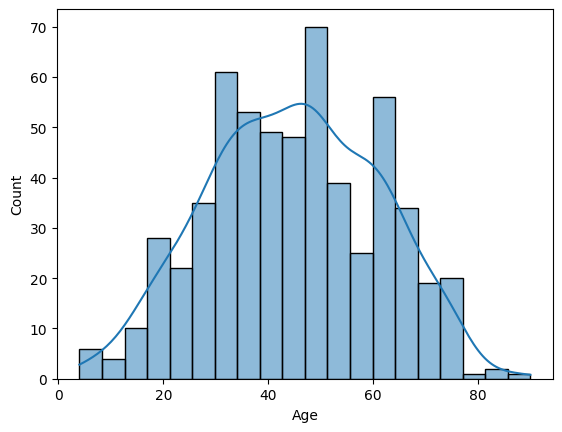

In [100]:
# 7. Visualisasi Data Usia Pasien
sns.histplot(df['Age'], bins=20, kde=True)


Grafik batang ini nunjukin jumlah pasien laki-laki dan perempuan.

Dari grafik, laki-laki lebih banyak dibanding perempuan.

<Axes: xlabel='Gender', ylabel='count'>

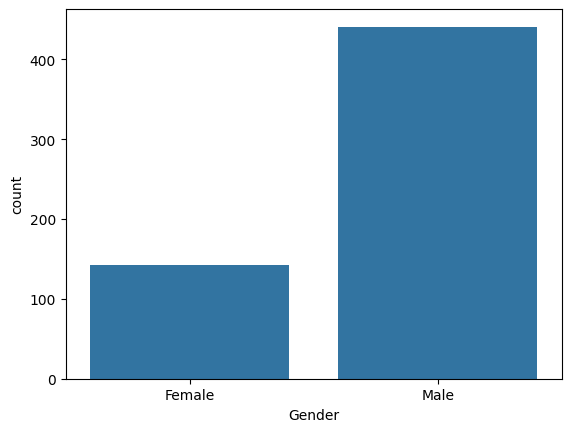

In [101]:
# 8. Visualisasi Data Gender Pasien
sns.countplot(data=df, x='Gender')


Peta panas (heatmap) yang nunjukin hubungan antar kolom angka.
1. Nilai mendekati 1 = sangat berhubungan positif.
2. Nilai mendekati -1 = sangat berhubungan negatif.
3. Nilai mendekati 0 = hampir nggak berhubungan.

Contoh:
Total Bilirubin & Direct Bilirubin = korelasi tinggi, karena direct adalah bagian dari total.

<Axes: >

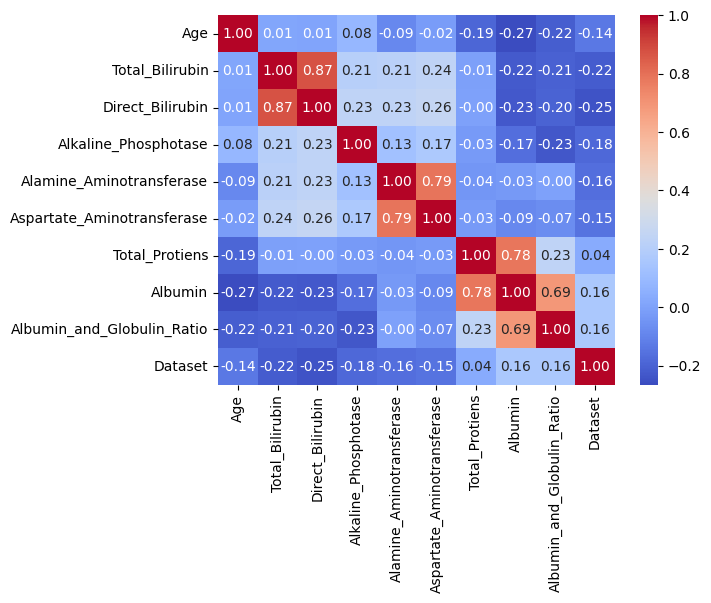

In [102]:
# 9. Heatmap Korelasi
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")


# 10. Kesimpulan
1. > Dataset berisi data pasien dengan atribut numerik (seperti umur, bilirubin, albumin, enzim hati) dan atribut kategorik (gender dan diagnosis). Jumlah pasien cukup banyak dengan lebih banyak atribut numerik dibanding kategorik.

2. > Dari statistik deskriptif terlihat bahwa sebagian besar pasien berada di usia paruh baya (40–60 tahun), dan ada beberapa nilai ekstrem terutama pada variabel medis seperti Total Bilirubin dan Enzim Hati, yang menunjukkan adanya kondisi pasien dengan penyakit liver yang cukup parah.

3. >Contoh 10 record pertama memperlihatkan keragaman kondisi pasien, dari yang memiliki nilai normal hingga ada yang cukup tinggi.

4. >Distribusi label pada atribut kategorik menunjukkan bahwa jumlah pasien laki-laki lebih banyak dibanding perempuan, dan jumlah pasien dengan penyakit liver lebih banyak dibanding yang sehat.

5. >Visualisasi histogram usia dan grafik distribusi gender mendukung temuan tersebut: pasien paling banyak adalah pria usia paruh baya.

6. >Dari heatmap korelasi terlihat bahwa beberapa indikator medis sangat berhubungan, misalnya Total Bilirubin dengan Direct Bilirubin, serta beberapa enzim hati yang menunjukkan variasi besar antar pasien.

>Secara keseluruhan, dapat disimpulkan bahwa mayoritas pasien liver disease adalah pria usia paruh baya dengan indikator medis utama berupa kadar bilirubin, albumin, dan enzim hati. Dataset ini memiliki potensi baik untuk analisis prediksi penyakit liver, namun perlu perhatian terhadap ketidakseimbangan jumlah pasien sakit dan sehat, serta penanganan nilai ekstrim (outlier).

**POSTTEST 3**

Mengambil dua class penting dari modul sklearn.preprocessing, yaitu:
1. StandardScaler
Fungsinya: menstandarkan (menormalkan) nilai-nilai fitur numerik.

Dalam dataset, tiap kolom bisa punya rentang nilai berbeda.
Contoh:
> - Age: 20–80
> - Alkaline_Phosphotase: 200–2000
> - Albumin: 2.5–5.5

Model seperti Logistic Regression, KNN, atau SVM sangat sensitif terhadap perbedaan skala ini. Jika tidak dinormalisasi, fitur dengan skala besar (misalnya Alkaline_Phosphotase) akan mendominasi perhitungan model.

Cara kerja:
StandardScaler mengubah setiap nilai menjadi:
> z=x − 𝜇​ / σ

Di mana:
- 𝑥 = nilai asli
- 𝜇 = rata-rata kolom
- 𝜎 = standar deviasi kolom

Hasilnya:
- Rata-rata kolom = 0
- Standar deviasi kolom = 1
> Tujuan ini ***Agar semua fitur numerik punya kontribusi seimbang terhadap hasil model.***

2. LabelEncoder
Fungsinya: mengubah nilai kategori (teks) menjadi angka.
>1. Banyak kolom dalam dataset berbentuk teks (contoh: "Male", "Female", "Yes", "No").
>2. Model machine learning tidak bisa memahami teks, hanya angka.
>M3. aka LabelEncoder digunakan untuk mengonversi label menjadi bentuk numerik:
>- "Female" → 0
>- "Male" → 1

In [103]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

Membagi dataset menjadi dua bagian:
>1. Training set → data yang digunakan untuk melatih model.
>2. Testing set → data yang digunakan untuk mengukur kinerja model.

Tujuan:
>1. Agar model tidak diuji dengan data yang sudah “dilihat” sebelumnya.
>2. Untuk mengevaluasi seberapa baik model bisa menggeneralisasi data baru.

In [104]:
from sklearn.model_selection import train_test_split


1. Data Cleaning adalah proses membersihkan data agar siap dianalisis atau digunakan di model machine learning.

2. Salah satu masalah yang sering ditemui adalah missing value (nilai kosong / NaN).

3. Baris kode ini termasuk handling missing value, yaitu mengisi nilai kosong pada kolom tertentu.

>a. df['Albumin_and_Globulin_Ratio']
>- df adalah DataFrame pandas, yaitu struktur data tabular mirip spreadsheet.
>- ['Albumin_and_Globulin_Ratio'] memilih kolom yang bernama Albumin_and_Globulin_Ratio.
>- Kolom ini biasanya berisi rasio Albumin terhadap Globulin dari hasil lab atau medis.

> b. fillna(...)
>- Fungsi fillna() digunakan untuk mengganti nilai kosong (NaN) dengan nilai tertentu.

> c. df['Albumin_and_Globulin_Ratio'].median()
>- Fungsi median() menghitung nilai tengah dari kolom (nilai yang membagi data menjadi dua bagian sama banyak).
>- Median sering digunakan untuk mengisi nilai kosong karena lebih tahan terhadap outlier dibanding rata-rata.

>d. Penugasan kembali
>- df['Albumin_and_Globulin_Ratio'] = ...
>- Hasil pengisian NaN disimpan kembali ke kolom yang sama, sehingga kolom sekarang tidak ada nilai kosong lagi.

Tujuannya:
1. Mengatasi missing value agar analisis statistik atau machine learning tidak terganggu.
2. Menggunakan median menjaga distribusi data tetap wajar dan tidak bias.
3. Contoh: Jika beberapa hasil lab kosong, mengisi dengan median memberikan perkiraan yang realistis dibanding angka sembarangan.

In [105]:
#1. DATA CLEANING (Handling Missing Value)
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())


Dalam data cleaning, salah satu masalah umum adalah data duplikat (baris yang sama persis muncul lebih dari sekali). Baris duplikat bisa menyebabkan analisis bias, misalnya menghitung rata-rata atau jumlah data menjadi salah.

>a. df.drop_duplicates()
>- Fungsi drop_duplicates() digunakan untuk menghapus baris yang duplikat dari DataFrame.
>- Defaultnya, pandas akan membandingkan seluruh kolom untuk menentukan apakah baris itu duplikat atau tidak.
>- Hanya baris pertama yang dipertahankan, baris berikutnya yang sama akan dihapus.

>b. inplace=True
>- Parameter inplace=True artinya perubahan dilakukan langsung pada DataFrame df.
>- Tanpa inplace=True, fungsi ini akan mengembalikan DataFrame baru dan df asli tidak berubah.

Tujuannya:
1. Menghapus baris duplikat agar data menjadi unik dan bersih.
2. Mencegah bias dalam analisis statistik atau model machine learning.

In [106]:
#1. DATA CLEANING (Handling Duplicate Value)
df.drop_duplicates(inplace=True)


>a. numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
>- select_dtypes(include=...) → memilih kolom dengan tipe data numerik (float64 dan int64).
>- numeric_cols → daftar nama kolom numerik yang akan diproses.
>- Tujuan: hanya menangani outlier di kolom numerik.

> b. for col in numeric_cols:
>- Memulai perulangan untuk setiap kolom numerik.
>- Artinya setiap kolom numerik akan diperiksa satu per satu.

> c. Q1 = df[col].quantile(0.25)
>- Menghitung kuartil pertama (25%) dari kolom.
>- 25% data berada di bawah nilai ini.

> d. Q3 = df[col].quantile(0.75)
>- Menghitung kuartil ketiga (75%) dari kolom.
>- 75% data berada di bawah nilai ini.

>e. IQR = Q3 - Q1
>- Menghitung Interquartile Range (IQR), yaitu rentang data di antara kuartil pertama dan ketiga.
>- IQR digunakan untuk menentukan batas normal data.

> f. lower_bound = Q1 - 1.5 * IQR

> g. upper_bound = Q3 + 1.5 * IQR
>- Menentukan batas bawah dan atas untuk mendeteksi outlier.
>- Aturan umum:
> >1.  Data < lower_bound → dianggap outlier bawah.
> >1. Data > upper_bound → dianggap outlier atas.

> h. df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
> Menyaring DataFrame:
>1. Hanya menyimpan baris yang nilai kolomnya berada dalam batas normal.
>2. Semua outlier dihapus.
> df diperbarui setiap iterasi, jadi semakin banyak kolom yang diperiksa, semakin ketat filter outlier.

Tujuannya:
1. Menghapus outlier numerik dari dataset menggunakan metode IQR (Interquartile Range).
2. Outlier bisa:
>- Mengganggu analisis statistik.
>- Mempengaruhi model machine learning secara negatif.
3. IQR adalah metode yang robust karena tidak terlalu terpengaruh oleh nilai ekstrem.

In [107]:
#1. DATA CLEANING (Handling Outlier (Metode IQR))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


> a. numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Dataset')
>- select_dtypes(include=['float64', 'int64']) → memilih kolom dengan tipe numerik (float64 dan int64).
>- .columns → mengambil daftar nama kolom.
>- .drop('Dataset') → menghapus kolom 'Dataset' dari daftar kolom numerik, karena biasanya kolom ini adalah label / target dan tidak ingin di-scaling.
>- Hasil: numeric_cols berisi semua kolom numerik kecuali kolom 'Dataset'.

> b. scaler = StandardScaler()
>- Membuat objek StandardScaler dari sklearn.preprocessing.
>- StandardScaler digunakan untuk standardisasi data:  z= x − mean​ / std
>1. Mean (rata-rata) = 0
>2. Standard deviation (standar deviasi) = 1

Tujuannya:
> agar semua fitur berada pada skala yang sama, penting untuk algoritma ML seperti KNN, SVM, atau regresi.

>c. df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
>- fit_transform() melakukan dua langkah sekaligus:
>1. fit() → menghitung mean dan std dari setiap kolom.
>2. transform() → menstandarkan setiap nilai dengan formula (x - mean) / std.
>- Hasilnya: semua kolom numerik memiliki mean ≈ 0 dan std ≈ 1.
>- Kolom 'Dataset' tetap tidak berubah.

Tujuannya:
>- Menyamakan skala semua fitur numerik agar model machine learning tidak bias terhadap fitur yang besar.
>- Membuat data lebih stabil untuk algoritma yang sensitif terhadap skala, seperti:
>1. K-Nearest Neighbors (KNN)
>2. Support Vector Machines (SVM)
>3. Gradient Descent-based algorithms
	​


In [108]:
#2. NORMALISASI / STANDARISASI KOLOM NUMERIK
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Dataset')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


- Dalam preprocessing data, algoritma machine learning biasanya hanya bisa bekerja dengan angka, bukan teks.

- Kolom Gender biasanya berisi kategori seperti "Female" dan "Male".

- Label Encoding digunakan untuk mengubah kategori menjadi angka

> a. encoder = LabelEncoder()
>- Membuat objek LabelEncoder dari sklearn.preprocessing.
>- Fungsinya: mengubah label kategorikal menjadi angka.
>- Label numerik diurutkan secara alfabet secara default.

> b. df['Gender'] = encoder.fit_transform(df['Gender'])
>- fit_transform() melakukan dua langkah:
>1.  fit() → membaca semua kategori unik di kolom 'Gender'.
>2.  transform() → mengubah kategori menjadi angka.
>- Hasilnya: kolom 'Gender' sekarang berisi angka (0 dan 1) bukan teks.
>- Komentar # Female = 0, Male = 1 menjelaskan hasil encoding.

Tujuannya:
>1. Agar kolom kategori bisa diproses oleh algoritma machine learning.
>2. Mengurangi masalah saat menggabungkan data numerik dan kategori.
>3. Mempermudah analisis statistik yang memerlukan angka.

In [109]:
#3. ENCODING KOLOM KATEGORIKAL
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  # Female = 0, Male = 1


- Digunakan untuk membuat fitur baru dari data yang sudah ada.
- Kolom yang terlibat:
>- Total_Bilirubin → total kadar bilirubin dalam darah.
>- Direct_Bilirubin → bilirubin langsung (direct).
- Tujuan: menghitung rasio bilirubin total terhadap direct bilirubin, tapi menghindari pembagian dengan nol.

> a. np.where(condition, x, y)
>- Fungsi numpy.where adalah cara vectorized untuk kondisi:
if condition:
    value = x
else:
    value = y
>- Artinya, untuk setiap baris:
>1. Jika condition True → ambil x
>2. Jika False → ambil y

> b. df['Direct_Bilirubin'] != 0
>- Kondisi untuk mencegah division by zero.
>- Jika Direct_Bilirubin tidak sama dengan 0 → lakukan pembagian.
>- Jika 0 → hasil langsung 0 (agar tidak error).

> c. df['Total_Bilirubin'] / df['Direct_Bilirubin']
>- Nilai jika kondisi True: hitung rasio total terhadap direct bilirubin.

> d. 0
>- Nilai jika kondisi False:
>- Jika Direct_Bilirubin = 0, rasio ditetapkan 0 untuk menghindari error.

Tujuannya:
1. Membuat fitur baru Bilirubin_Ratio.
2. Menghindari error pembagian dengan nol.
3. Memberikan informasi tambahan yang bisa digunakan dalam analisis atau model ML

In [110]:
#4. FEATURE ENGINEERING
df['Bilirubin_Ratio'] = np.where(
    df['Direct_Bilirubin'] != 0,
    df['Total_Bilirubin'] / df['Direct_Bilirubin'],
    0
)


> a. X = df.drop('Dataset', axis=1)
>- df.drop('Dataset', axis=1) → menghapus kolom 'Dataset' dari DataFrame.
>- axis=1 berarti menghapus kolom (bukan baris).
>- X → berisi semua fitur/variabel independen yang digunakan untuk prediksi.

> b. y = df['Dataset']
>- y → berisi kolom 'Dataset', yaitu target/label yang ingin diprediksi.
>- Contoh: apakah pasien sakit hati atau tidak (0 atau 1), tergantung isi dataset.

> c. train_test_split(...)
>- Fungsi dari sklearn.model_selection untuk membagi dataset menjadi training dan testing.
>- Parameter penting:
>1. X, y → fitur dan target.
>2. test_size=0.2 → 20% data untuk testing, 80% untuk training.
>3. random_state=42 → seed untuk memastikan pembagian data reproducible.
>4. stratify=y → memastikan proporsi kelas di target tetap sama di train dan test.

> d. Hasil pembagian
>- X_train → data fitur untuk melatih model.
>- X_test → data fitur untuk mengukur performa model.
>- y_train → target untuk melatih model.
>- y_test → target untuk mengukur performa model.

Tujuannya:
1. Memisahkan fitur (X) dan target (y).
2. Membagi dataset menjadi training set dan testing set untuk evaluasi model.
3. Menggunakan stratifikasi agar proporsi kelas tetap sama di kedua set, penting jika dataset tidak seimbang.

In [111]:
#5. SPLITTING DATA
X = df.drop('Dataset', axis=1)
y = df['Dataset']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


> a. X_train.shape dan X_test.shape
>- .shape adalah atribut DataFrame (atau array) yang menunjukkan ukuran data dalam bentuk (baris, kolom).
>1. Baris → jumlah sampel/data point.
>2. Kolom → jumlah fitur/variabel.

> b. X_train
> - Ini adalah fitur untuk data training, hasil dari train_test_split.
> - X_train.shape memberi tahu kita berapa banyak sampel dan fitur yang digunakan untuk melatih model.

>c. X_test
>- Ini adalah fitur untuk data testing, juga hasil dari train_test_split.
>- X_test.shape memberi tahu kita berapa banyak sampel dan fitur yang digunakan untuk mengevaluasi model setelah training.

>d. Fungsi print
>- print("Ukuran data training:", X_train.shape) → mencetak sesuatu seperti: Ukuran data training: **(400, 10)** Artinya ada 400 sampel dan 10 fitur untuk training.
>- print("Ukuran data testing:", X_test.shape) → mencetak sesuatu seperti: Ukuran data testing:** (100, 10)** Artinya ada 100 sampel dan 10 fitur untuk testing.


In [112]:
#6. DATA TESTING YANG SUDAH DI BUAT
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)


Ukuran data training: (259, 11)
Ukuran data testing: (65, 11)


**Menampilkan fitur data testing**
1. X_test → fitur (variabel input) dari data testing yang akan dipakai untuk prediksi.
2. .head() → menampilkan 5 baris pertama dari DataFrame, agar tidak memenuhi layar jika datanya banyak.
3. Hasilnya akan terlihat seperti tabel dengan kolom-kolom fitur dan 5 sampel pertama.

**Menampilkan label/target data testing**
1. y_test → label/target sebenarnya dari data testing.
2. \n → membuat baris kosong sebelum menampilkan label supaya lebih rapi.
3. .head() → menampilkan 5 label pertama, sehingga kamu bisa membandingkan dengan hasil prediksi nanti.

In [113]:
#6. DATA TESTING (X_test dan y_test)
print("Data testing (X_test):")
print(X_test.head())  # menampilkan 5 baris pertama

print("\nLabel data testing (y_test):")
print(y_test.head()) # menampilkan 5 baris pertama


Data testing (X_test):
          Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
3    0.808476       1        -0.030158          0.224532   
430  0.511350       0        -0.628404         -0.819703   
439 -0.142327       0        -0.428989         -0.471625   
524 -0.914855       1        -0.428989         -0.471625   
221  0.154799       1        -0.229574         -0.471625   

     Alkaline_Phosphotase  Alamine_Aminotransferase  \
3               -0.341152                 -1.153243   
430             -0.341152                 -0.704054   
439             -0.570168                 -0.329729   
524             -0.766468                 -1.302973   
221             -0.177569                  0.643515   

     Aspartate_Aminotransferase  Total_Protiens   Albumin  \
3                     -0.825591        0.188415  0.082852   
430                    0.077862       -1.749564 -1.950790   
439                   -0.964584       -0.392979 -0.323876   
524                   -1.173073        0.

>a. print(X_test)
>- Menampilkan semua sampel dan semua kolom fitur dari data testing (X_test).
>- Setiap baris = satu sampel testing.
>- Setiap kolom = satu fitur (misal: Age, Gender, Total_Bilirubin, dll).
>- Jika dataset besar, outputnya bisa sangat panjang.

>b. print(y_test)
>- Menampilkan semua label/target dari data testing (y_test).
>- Setiap baris = label yang sesuai dengan sampel di X_test.
>- Berguna untuk membandingkan prediksi model nanti dengan nilai sebenarnya.

In [114]:
#6. DATA TESTING SEMUA DATANYA
print(X_test)
print(y_test)


          Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
3    0.808476       1        -0.030158          0.224532   
430  0.511350       0        -0.628404         -0.819703   
439 -0.142327       0        -0.428989         -0.471625   
524 -0.914855       1        -0.428989         -0.471625   
221  0.154799       1        -0.229574         -0.471625   
..        ...     ...              ...               ...   
292  0.035949       1        -0.827819         -0.471625   
542  1.046177       1        -0.628404         -0.471625   
523  0.333075       1        -0.827819         -0.471625   
545  0.035949       0        -0.628404         -0.471625   
210 -0.974280       1        -0.428989         -0.123546   

     Alkaline_Phosphotase  Alamine_Aminotransferase  \
3               -0.341152                 -1.153243   
430             -0.341152                 -0.704054   
439             -0.570168                 -0.329729   
524             -0.766468                 -1.302973   
221 

1. X_test.to_csv("X_test.csv", index=False)
>- X_test → fitur dari data testing.
>- to_csv("X_test.csv") → menyimpan DataFrame X_test menjadi file CSV bernama X_test.csv.
>- index=False → tidak menyertakan nomor indeks baris di file CSV, supaya hanya kolom data yang tersimpan.

2. y_test.to_csv("y_test.csv", index=False)
>- y_test → label/target dari data testing.
>- Disimpan ke file CSV bernama y_test.csv.
>- index=False → sama, supaya file CSV bersih tanpa kolom indeks.

**Memiliki dua file CSV di folder kerja:**
1. X_test.csv → semua fitur data testing
2. y_test.csv → semua label data testing

In [115]:
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


**POSTTEST 3**

1. train_test_split: Membagi data menjadi training dan testing set

2. StandardScaler: Menormalisasi fitur ke skala yang sama

3. LabelEncoder: Mengubah label kategorikal menjadi numerik

4. SVC: Support Vector Classifier

5. RandomForestClassifier: Ensemble method dengan multiple decision trees

6. KNeighborsClassifier: K-Nearest Neighbors classifier

7. GaussianNB: Naive Bayes dengan distribusi Gaussian

8. classification_report: Laporan evaluasi klasifikasi

9. confusion_matrix: Matriks untuk melihat performa klasifikasi

10. accuracy_score: Mengukur akurasi model

11. SimpleImputer: Untuk menangani missing values

warnings.filterwarnings('ignore') = Fungsinya untuk MENYEMBUNYIKAN pesan peringatan dari Python agar output lebih RAPI dan TIDAK BERANTAKAN.
Contohnya seperti = Seperti "mematikan notifikasi spam" di HP agar tidak terganggu saat fokus bekerja.



In [116]:
#1. Import Libraries dan Inisialisasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

>Tujuannya EDA: Memahami karakteristik data sebelum pemodelan.

Tahap ini membantu mengetahui:
> 1. Berapa banyak data yang tersedia (jumlah baris & kolom)
> 2. Jenis dan isi data di setiap kolom,
>3. Adanya nilai kosong (missing values),
>4. Persebaran label target yang akan diprediksi.

1. print("Dataset Shape:", df.shape)
Perintah ini menampilkan ukuran (dimensi) dari dataset, yaitu:
>1. Jumlah baris (rows) → banyaknya data atau observasi.
>2. Jumlah kolom (columns) → banyaknya variabel atau fitur yang dimiliki setiap data.

Contohnya:
>Dataset Shape: (583, 11)
Artinya dataset memiliki 583 baris data dan 11 kolom fitur.


2. print("\nFirst 5 rows:")
print(df.head())

>Kode ini menampilkan 5 data pertama dalam dataset untuk memberikan gambaran umum tentang isi data.
Dari sini bisa terlihat kolom-kolom seperti:
>> Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Albumin, Dataset, dll.

3. print("\nDataset Info:")

   print(df.info())
> 1. Perintah ini menampilkan informasi struktur dataset, seperti:
> 2. Nama setiap kolom,
> 3. Tipe data (int64, float64, atau object),
> 4. Jumlah nilai non-null (data yang tidak kosong) per kolom.

Contohnya:
> jika Gender bertipe object, berarti berisi data teks seperti “Male” atau “Female” yang nantinya perlu diubah menjadi angka untuk model machine learning.

4. print("\nMissing Values:")
   
   print(df.isnull().sum())
> Bagian ini mengecek berapa banyak data yang hilang (missing) di setiap kolom.
Hasilnya berupa jumlah nilai kosong untuk tiap kolom.
Langkah ini penting karena:
> 1. Jika jumlahnya kecil → bisa diisi (imputasi) dengan rata-rata/median.
>2. Jika banyak → bisa dipertimbangkan untuk dihapus.

5. print("\nTarget Distribution:")
   
   print(df['Dataset'].value_counts())
> Kode ini menghitung jumlah data per kelas (label) pada kolom target Dataset.

Biasanya:
>1. 1 = pasien menderita penyakit hati,
>2. 2 = pasien tidak menderita penyakit hati.

Artinya terdapat ketidakseimbangan kelas (imbalanced dataset), karena data pasien liver jauh lebih banyak dibanding pasien sehat.

In [117]:
#2.  Exploratory Data Analysis (EDA)
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nTarget Distribution:")
print(df['Dataset'].value_counts())

Dataset Shape: (324, 12)

First 5 rows:
        Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  1.224453       0        -0.628404         -0.819703             -0.259360   
3  0.808476       1        -0.030158          0.224532             -0.341152   
5  0.095374       1         1.565162          1.268767              0.084165   
6 -1.093131       0        -0.229574         -0.471625             -0.799185   
7 -0.914855       0        -0.229574         -0.123546             -0.013985   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                 -1.003514                   -0.964584        0.188415   
3                 -1.153243                   -0.825591        0.188415   
5                 -0.778919                   -1.242569        0.963606   
6                 -1.003514                   -1.381562        0.382212   
7                 -1.153243                   -1.451058        0.091516   

    Albumin  Albumin_and_Glo

Tujuan Preprocessing
> Tahapan data preprocessing bertujuan untuk menyiapkan data agar siap digunakan oleh model machine learning.
Karena algoritma seperti SVM, Random Forest, dan KNN hanya dapat bekerja dengan data numerik dan tidak boleh ada nilai kosong (NaN), maka data perlu dibersihkan dan diubah terlebih dahulu.

Langkah utama pada tahap ini meliputi:
>1. Menangani nilai kosong (missing values).
>2. Mengonversi data kategorikal (Gender) menjadi numerik.

1. print("Missing values before handling:")
  
  print(df.isnull().sum())
> Kode ini digunakan untuk mengecek jumlah nilai kosong di setiap kolom sebelum dilakukan perbaikan.

Tujuannya
>mengetahui kolom mana saja yang memiliki data hilang (misalnya Albumin_and_Globulin_Ratio biasanya memiliki beberapa nilai NaN).

2. imputer = SimpleImpute (strategy='median')
  
  df['Albumin_and_Globulin_Ratio'] = imputer.fit_transform(df[['Albumin_and_Globulin_Ratio']])

> Bagian ini berfungsi untuk mengisi nilai kosong (missing values) pada kolom Albumin_and_Globulin_Ratio.
>1. SimpleImputer adalah fungsi dari library sklearn yang secara otomatis mengganti nilai kosong berdasarkan metode tertentu.
>2. strategy='median' berarti nilai kosong akan diganti dengan nilai tengah (median) dari kolom tersebut.

Kenapa menggunakan median, bukan mean?
> Karena median lebih tahan terhadap outlier (nilai ekstrem). Jika ada data yang sangat tinggi atau rendah, median tidak akan terlalu terpengaruh — sehingga hasilnya lebih stabil.

3. le = LabelEncoder()
   
   df['Gender'] = le.fit_transform(df['Gender'])
> Tahapan ini mengubah kolom Gender yang semula berupa teks (Male, Female) menjadi angka agar bisa diproses oleh algoritma.

Hasil pengkodean:
1. Female → 0
2. Male → 1

4. print("\nMissing values after handling:")
  
  print(df.isnull().sum())
> Setelah semua proses di atas selesai, kode ini digunakan untuk memastikan tidak ada lagi nilai kosong dalam dataset.



In [118]:
#3. Data Preprocessing
# Handle missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values in Albumin_and_Globulin_Ratio with median
imputer = SimpleImputer(strategy='median')
df['Albumin_and_Globulin_Ratio'] = imputer.fit_transform(df[['Albumin_and_Globulin_Ratio']])

# Convert Gender to numerical values
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # 0: Female, 1: Male

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
Bilirubin_Ratio               0
dtype: int64

Missing values after handling:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
Bilirubin_Ratio               0
dtype: int64


> Tahapan ini dilakukan untuk mempersiapkan data agar siap digunakan dalam pelatihan model machine learning.

Langkah-langkah utamanya meliputi:
>1. Memisahkan fitur (X) dan target (y).
>2. Membagi dataset menjadi data latih (train) dan data uji (test).
>3. Melakukan standardisasi (scaling) agar semua fitur berada pada skala yang seimbang.

1. X = df.drop('Dataset', axis=1)
> Perintah ini membuat variabel X (features) yang berisi semua kolom kecuali kolom target Dataset.

Artinya, X berisi seluruh fitur prediktor, seperti:
>- Age, Gender, Total_Bilirubin, Direct_Bilirubin,
Alkaline_Phosphotase, Alamine_Aminotransferase,
Aspartate_Aminotransferase, Total_Protiens,
Albumin, dan Albumin_and_Globulin_Ratio.

2. y = df['Dataset']
> Variabel y menyimpan kolom target yang ingin diprediksi, yaitu status penyakit hati.

1. Nilai 1 menunjukkan pasien memiliki penyakit hati.
2. Nilai 2 menunjukkan pasien sehat.

3. train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
> Kode ini digunakan untuk membagi dataset menjadi data latih dan data uji dengan ketentuan berikut:

>1. test_size=0.3 → 30% dari data digunakan untuk pengujian (testing), sedangkan 70% sisanya untuk pelatihan (training).
>2. random_state=42 → memastikan hasil pembagian selalu sama setiap kali dijalankan (reproducible).
>3. stratify=y → menjaga proporsi kelas (antara label 1 dan 2) tetap sama di data train dan test, agar tidak terjadi ketimpangan kelas.

Tujuanya pembagian ini:
>1. Data Train (70%) → digunakan untuk melatih model.
>2. Data Test (30%) → digunakan untuk mengevaluasi seberapa baik model dapat memprediksi data baru yang belum pernah dilihat sebelumnya.

3. caler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Tahapan ini adalah standardisasi (feature scaling) agar semua fitur memiliki skala yang sama.

>1. StandardScaler mengubah setiap fitur menjadi nilai dengan rata-rata (mean) = 0 dan standar deviasi (std) = 1.
>2. Scaling hanya dilakukan berdasarkan data train (fit_transform pada X_train), kemudian diterapkan pada data test (transform pada X_test).

In [119]:
#4. DATA SPLITTING & SCALING
# Prepare features and target
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Tahapan ini bertujuan untuk melatih model klasifikasi menggunakan algoritma Support Vector Machine (SVM) dengan tipe Support Vector Classifier (SVC).

Model ini akan mempelajari pola hubungan antara fitur-fitur medis (seperti usia, kadar bilirubin, enzim hati, dll.) terhadap label target (Dataset) — apakah pasien memiliki penyakit hati (1) atau tidak (2).

1. svc = SVC(kernel='rbf', random_state=42, probability=True)

Baris ini membuat objek model SVC dari library sklearn.svm.

>1. kernel='rbf' → menggunakan Radial Basis Function (RBF kernel).
Kernel ini sering dipakai karena dapat memetakan data yang tidak linear ke ruang dimensi lebih tinggi agar dapat dipisahkan dengan baik oleh model.

>2. random_state=42 → digunakan agar hasil pelatihan model bersifat konsisten setiap kali dijalankan.

>3. probability=True → memungkinkan model menghasilkan probabilitas prediksi (bukan hanya kelas), sehingga bisa digunakan nanti untuk ROC Curve atau AUC Score.


2. svc.fit(X_train_scaled, y_train)
> Perintah ini digunakan untuk melatih model menggunakan data latih yang telah melalui proses scaling.

Pada tahap ini:
>1. Model belajar dari fitur (X_train_scaled) dan label (y_train).
>2. SVC akan menghitung parameter-parameter optimal yang memaksimalkan jarak antar kelas di ruang fitur.

Hasilnya:
> model siap digunakan untuk memprediksi data baru.

3. y_pred_svc = svc.predict(X_test_scaled)
> Baris ini digunakan untuk memprediksi kelas (output) pada data uji (X_test_scaled).

>1. Hasilnya berupa array berisi angka 1 atau 2, yang menunjukkan apakah pasien diprediksi memiliki penyakit hati atau tidak.
>2. Nilai ini nanti akan dibandingkan dengan y_test (label sebenarnya) untuk menghitung akurasi dan metrik evaluasi lainnya.

4. y_prob_svc = svc.predict_proba(X_test_scaled)
> Perintah ini menghasilkan probabilitas prediksi untuk setiap kelas, bukan hanya hasil klasifikasinya.

In [120]:
#5. Implementasi Model Klasifikasi
#A. Support Vector Classifier (SVC)
svc = SVC(kernel='rbf', random_state=42, probability=True)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
y_prob_svc = svc.predict_proba(X_test_scaled)

Random Forest mampu menangani:
>1. Data numerik dan kategorikal
>2. Fitur yang saling berkorelasi
>3. Overfitting lebih rendah dibandingkan decision tree tunggal.

Selain itu, algoritma ini sering digunakan untuk mendapatkan interpretasi penting dari fitur-fitur (feature importance) yang mempengaruhi prediksi.

1. rf = RandomForestClassifier(n_estimators=100, random_state=42)
>1. Membuat model Random Forest Classifier, yaitu algoritma ensemble learning yang menggabungkan banyak decision tree untuk menghasilkan prediksi yang lebih akurat dan stabil.
>2. n_estimators=100 artinya model akan membangun 100 pohon keputusan. Semakin banyak pohon, biasanya semakin akurat, tetapi waktu komputasi juga meningkat.
>3. random_state=42 digunakan agar hasil eksperimen selalu sama setiap kali dijalankan (reproducibility).

2. rf.fit(X_train, y_train)
>1. Melatih model menggunakan data training (X_train dan y_train).
>2. Model akan belajar pola dari data untuk dapat mengklasifikasikan pasien apakah memiliki penyakit hati atau tidak.

3. y_pred_rf = rf.predict(X_test)
>1. Menggunakan model yang telah dilatih untuk memprediksi label kelas pada data uji (X_test).
>2. Hasilnya disimpan dalam variabel y_pred_rf, berisi nilai 1 (positif penyakit hati) atau 2 (negatif penyakit hati).

4. y_prob_rf = rf.predict_proba(X_test)
>1. Menghasilkan probabilitas prediksi untuk setiap kelas.
>2. Misalnya, output [0.85, 0.15] berarti model memperkirakan peluang 85% pasien memiliki penyakit hati, dan 15% tidak.

In [121]:
#5. Implementasi Model Klasifikasi
#B. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)

Cara Kerja: Klasifikasi berdasarkan mayoritas vote dari k tetangga terdekat

1. knn = KNeighborsClassifier(n_neighbors=5)
>1. Membuat model K-Nearest Neighbors (KNN) dengan jumlah tetangga terdekat (k) sebanyak 5.
>2. KNN bekerja dengan cara mencari 5 titik data terdekat (berdasarkan jarak Euclidean) dari data yang akan diprediksi, lalu menentukan kelas berdasarkan mayoritas label dari tetangga-tetangga tersebut.
>3. Contoh: Jika 3 dari 5 tetangga terdekat berlabel “positif penyakit hati”, maka data baru diprediksi sebagai “positif penyakit hati”.

2. knn.fit(X_train_scaled, y_train)
>1. Melatih model KNN dengan data training yang sudah diskalakan (X_train_scaled).
>2. KNN sangat sensitif terhadap skala data, jadi penting untuk melakukan StandardScaler seperti yang sudah kamu lakukan sebelumnya.

3. y_pred_knn = knn.predict(X_test_scaled)
>1. Menggunakan model KNN yang telah dilatih untuk memprediksi label kelas pada data uji (X_test_scaled).
>2. Output-nya berupa kelas (misal 1 untuk “penyakit hati”, 2 untuk “tidak ada penyakit hati”).

4. y_prob_knn = knn.predict_proba(X_test_scaled)
>1. Menghasilkan probabilitas setiap data uji terhadap masing-masing kelas.
>2. Misalnya [0.7, 0.3] berarti model memperkirakan peluang 70% pasien memiliki penyakit hati dan 30% tidak.

Menggunakan KKN, karna:
1. Mudah dipahami dan tidak memerlukan asumsi distribusi data.
2. Cocok untuk dataset dengan jumlah fitur tidak terlalu besar.
3. Mengandalkan kemiripan data (similarity), sehingga efektif pada data yang jelas terpisah antar kelasnya.

kelemahannya:
1. Lambat jika dataset besar, karena menghitung jarak ke semua titik.
2. Sensitif terhadap skala dan outlier, sehingga perlu standarisasi data.


In [122]:
#5. Implementasi Model Klasifikasi
#C. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)

Cara Kerja: Menghitung probability conditional berdasarkan training data

1. nb = GaussianNB()
>1. Membuat model Naive Bayes tipe GaussianNB, yaitu algoritma klasifikasi berbasis teorema Bayes dengan asumsi bahwa setiap fitur bersifat independen (tidak saling bergantung).
>.2 Tipe Gaussian digunakan karena model ini mengasumsikan bahwa nilai fitur berdistribusi normal (Gaussian Distribution).
>3. Cocok untuk data numerik kontinu, seperti umur, kadar bilirubin, albumin, dll dalam dataset penyakit hati.

2. nb.fit(X_train, y_train)
>1. Melatih model menggunakan data training (X_train dan y_train).
>2. Model akan menghitung probabilitas setiap kelas dan rata-rata serta varians tiap fitur per kelas untuk membentuk model prediksi berbasis probabilitas.

3. y_pred_nb = nb.predict(X_test)
>1. Menggunakan model yang telah dilatih untuk memprediksi label kelas pada data uji (X_test).
>2. Output-nya adalah label kelas akhir (1 atau 2) berdasarkan probabilitas terbesar.

4. y_prob_nb = nb.predict_proba(X_test)
>1. Menghasilkan probabilitas prediksi dari setiap kelas untuk masing-masing data uji.
>2. Misalnya [0.8, 0.2] berarti model memperkirakan peluang 80% pasien termasuk kelas “penyakit hati”, dan 20% “tidak”.

Menggunakan Naive Bayes, karena:
1. Cepat dan efisien, bahkan untuk dataset besar.
2. Bekerja baik pada data dengan banyak fitur.
3. Cocok untuk kasus klasifikasi probabilistik, seperti diagnosis penyakit.
4. Tidak mudah overfitting dan mampu memberikan hasil kuat meski asumsi independensinya tidak selalu terpenuhi.

Kelemahan:
1. Asumsi independensi antar fitur jarang benar di dunia nyata.
2. Jika distribusi data tidak normal, performanya bisa menurun.

In [123]:
#5. Implementasi Model Klasifikasi
#D. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)

Fungsi ini digunakan untuk mengevaluasi kinerja model klasifikasi dengan cara menampilkan jumlah prediksi benar dan salah dalam bentuk grafik yang mudah dipahami.
Dengan Confusion Matrix, kita dapat melihat seberapa baik model membedakan antara pasien yang memiliki penyakit hati (Liver Disease) dan yang sehat (Healthy).

1. def plot_confusion_matrix(y_true, y_pred, model_name):
>1. Mendefinisikan sebuah fungsi bernama plot_confusion_matrix dengan tiga parameter:
>2. y_true: label sebenarnya dari data uji.
>3. y_pred: label hasil prediksi dari model.
>4. model_name: nama model (misalnya “SVC” atau “Random Forest”) agar mudah dibedakan saat ditampilkan.

2. cm = confusion_matrix(y_true, y_pred)
> 1. Menghitung Confusion Matrix, yaitu tabel yang menunjukkan perbandingan antara prediksi model dan nilai aktual.
>2. Dengan kata lain:
>- TP: Model benar memprediksi pasien sakit.
>- TN: Model benar memprediksi pasien sehat.
>- FP: Model salah memprediksi pasien sehat sebagai sakit.
>- FN: Model salah memprediksi pasien sakit sebagai sehat.

3. plt.figure(figsize=(6, 5))
> Mengatur ukuran grafik agar tampil lebih jelas.

4. sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Liver Disease', 'Healthy'], yticklabels=['Liver Disease', 'Healthy'])

>1. Menggunakan heatmap dari Seaborn untuk menampilkan Confusion Matrix dalam bentuk visual yang menarik.
>2. Parameter penting:
>- annot=True → Menampilkan nilai di setiap sel.
>- fmt='d' → Format angka sebagai bilangan bulat.
>- cmap='Blues' → Memberi warna gradasi biru agar mudah dibaca.
>- xticklabels & yticklabels → Memberi label yang informatif (“Liver Disease” dan “Healthy”).

5. plt.title(f'Confusion Matrix - {model_name}')
>1. Memberi judul sesuai dengan nama model yang sedang dievaluasi.
>2. Contoh hasilnya: “Confusion Matrix – Random Forest”

6. plt.ylabel('Actual') dan plt.xlabel('Predicted')
>1. Memberi label pada sumbu y (nilai sebenarnya) dan sumbu x (prediksi model).
>2. Ini penting agar pembaca grafik tahu arah interpretasi data.

7. plt.show()
> Menampilkan hasil visualisasi ke layar.

In [124]:
#6. Fungsi Evaluasi - Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Liver Disease', 'Healthy'],
               yticklabels=['Liver Disease', 'Healthy'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

>- classification_report(): Menghasilkan precision, recall, f1-score

>- accuracy_score(): Mengukur overall accuracy

Metrics dalam Classification Report:
>1. Precision: TP / (TP + FP) - Akurasi prediksi positif
>2. Recall: TP / (TP + FN) - Kemampuan menemukan semua positif
>3. F1-Score: Harmonic mean of precision dan recall
>4. Support: Jumlah sampel aktual di setiap kelas




EVALUATION RESULTS - Support Vector Classifier


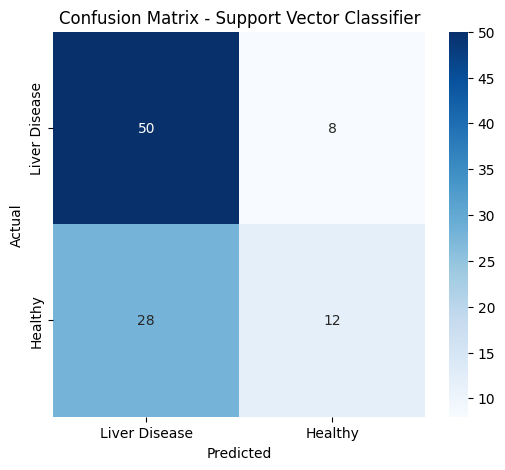

Classification Report:
               precision    recall  f1-score   support

Liver Disease       0.64      0.86      0.74        58
      Healthy       0.60      0.30      0.40        40

     accuracy                           0.63        98
    macro avg       0.62      0.58      0.57        98
 weighted avg       0.62      0.63      0.60        98

Accuracy: 0.6327

EVALUATION RESULTS - Random Forest


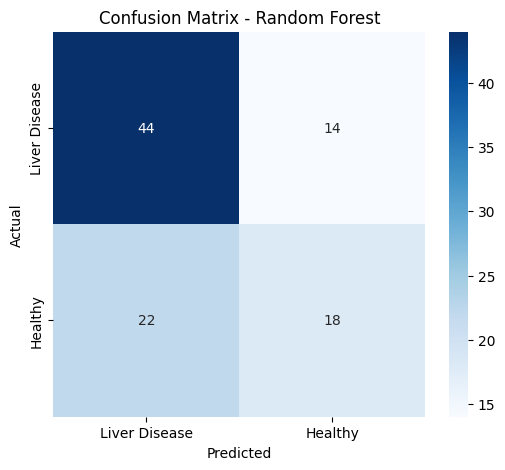

Classification Report:
               precision    recall  f1-score   support

Liver Disease       0.67      0.76      0.71        58
      Healthy       0.56      0.45      0.50        40

     accuracy                           0.63        98
    macro avg       0.61      0.60      0.60        98
 weighted avg       0.62      0.63      0.62        98

Accuracy: 0.6327

EVALUATION RESULTS - K-Nearest Neighbors


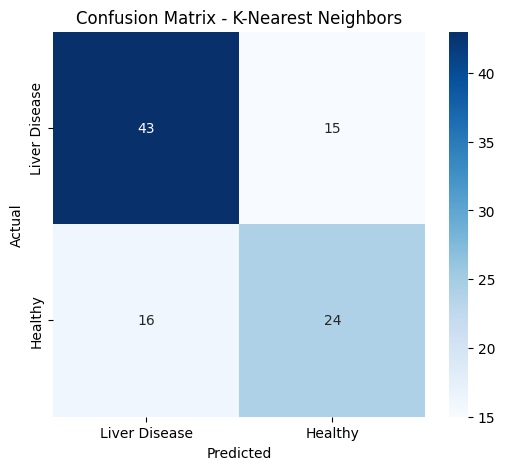

Classification Report:
               precision    recall  f1-score   support

Liver Disease       0.73      0.74      0.74        58
      Healthy       0.62      0.60      0.61        40

     accuracy                           0.68        98
    macro avg       0.67      0.67      0.67        98
 weighted avg       0.68      0.68      0.68        98

Accuracy: 0.6837

EVALUATION RESULTS - Naive Bayes


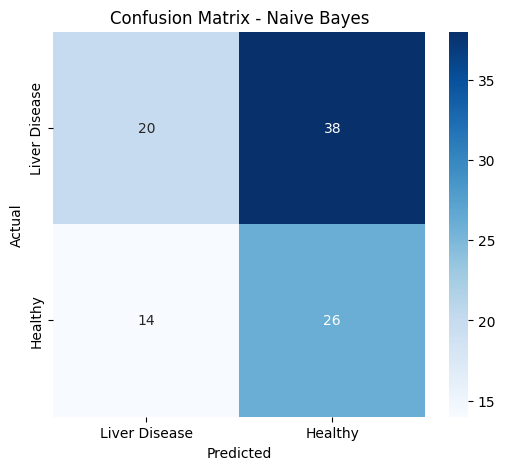

Classification Report:
               precision    recall  f1-score   support

Liver Disease       0.59      0.34      0.43        58
      Healthy       0.41      0.65      0.50        40

     accuracy                           0.47        98
    macro avg       0.50      0.50      0.47        98
 weighted avg       0.51      0.47      0.46        98

Accuracy: 0.4694


In [125]:
#7. Comprehensive Evaluation
models = {
    'Support Vector Classifier': (y_pred_svc, y_prob_svc),
    'Random Forest': (y_pred_rf, y_prob_rf),
    'K-Nearest Neighbors': (y_pred_knn, y_prob_knn),
    'Naive Bayes': (y_pred_nb, y_prob_nb)
}

for model_name, (y_pred, y_prob) in models.items():
    print(f"\n{'='*50}")
    print(f"EVALUATION RESULTS - {model_name}")
    print(f"{'='*50}")

    # Confusion Matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred,
                              target_names=['Liver Disease', 'Healthy']))

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

>- Bar chart untuk membandingkan accuracy semua model

>- Warna berbeda untuk setiap model

>- Rotasi label untuk readability

>- Batas y-axis 0-1 karena accuracy range 0-1

([0, 1, 2, 3],
 [Text(0, 0, 'Support Vector Classifier'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'K-Nearest Neighbors'),
  Text(3, 0, 'Naive Bayes')])

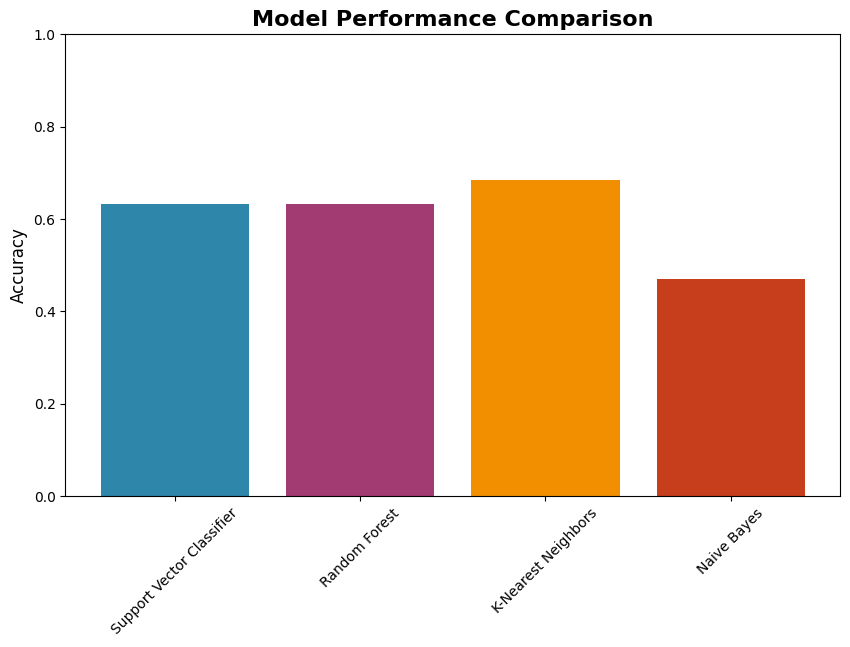

In [126]:
#8. Visualisasi Performa Model
# Plot comparison of model performances
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, models[name][0]) for name in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)

>- roc_curve(): Menghitung False Positive Rate dan True Positive Rate

>- auc(): Menghitung Area Under Curve

>- FPR: False Positive Rate (1 - Specificity)

>- TPR: True Positive Rate (Recall/Sensitivity)

>- AUC: Area Under Curve (semakin mendekati 1 semakin baik)

>- Diagonal: Random classifier (AUC = 0.5)

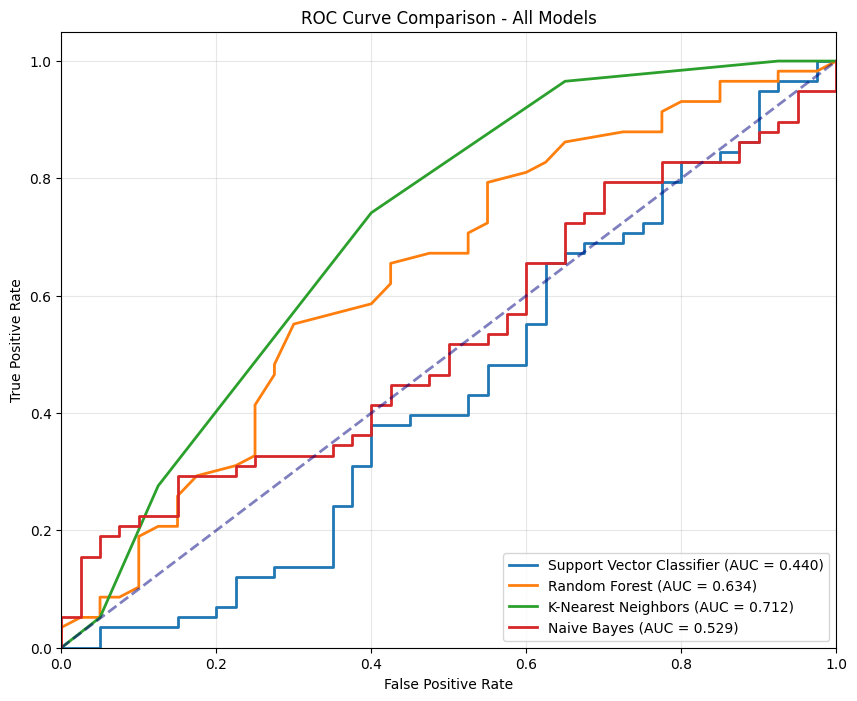

In [127]:
#9. ROC Curve Analysis
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for model_name, (_, y_prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 0], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - All Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

Diagram batang horizontal yang menunjukkan:
1. Fitur dengan batang terpanjang = paling berpengaruh dalam prediksi penyakit liver

2. Fitur di paling atas = paling penting

3. Nilai Importance: Seberapa sering fitur digunakan dalam decision trees untuk memisahkan data

sudah

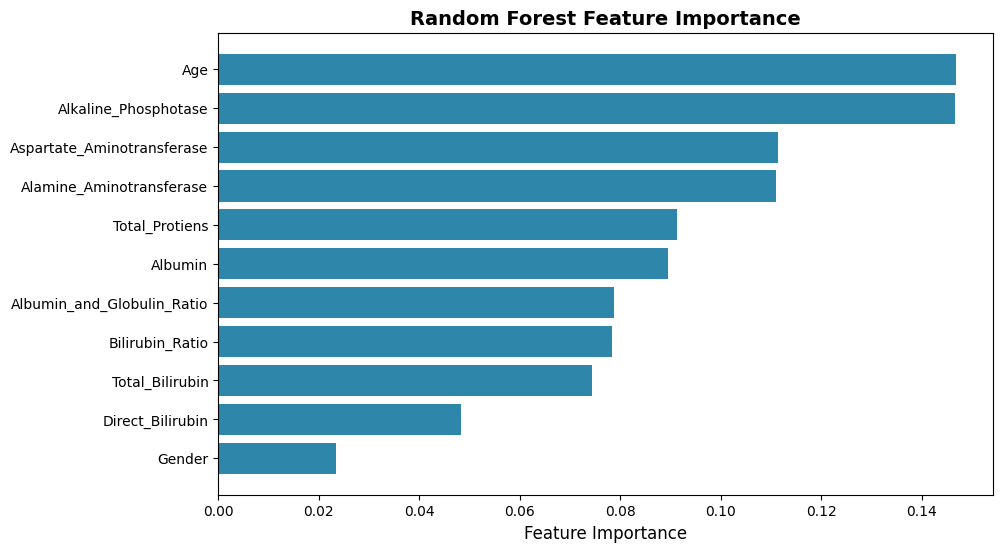

In [128]:
#10. Feature Importance Analysis
# Feature importance (for Random Forest)
feature_importance = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), feature_importance[indices], color='#2E86AB')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Biar urutan paling penting di atas
plt.show()
